<a href="https://colab.research.google.com/github/VDeshmukhCemtrex/Machine-Learning-Algorithms/blob/main/Scaler_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/VDeshmukhCemtrex/Datasets/main/avocado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [69]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [70]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [71]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [72]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })
df['Date'] =pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 11569 to 8814
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   Small Hass    18249 non-null  float64       
 4   Large Hass    18249 non-null  float64       
 5   XLarge Hass   18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


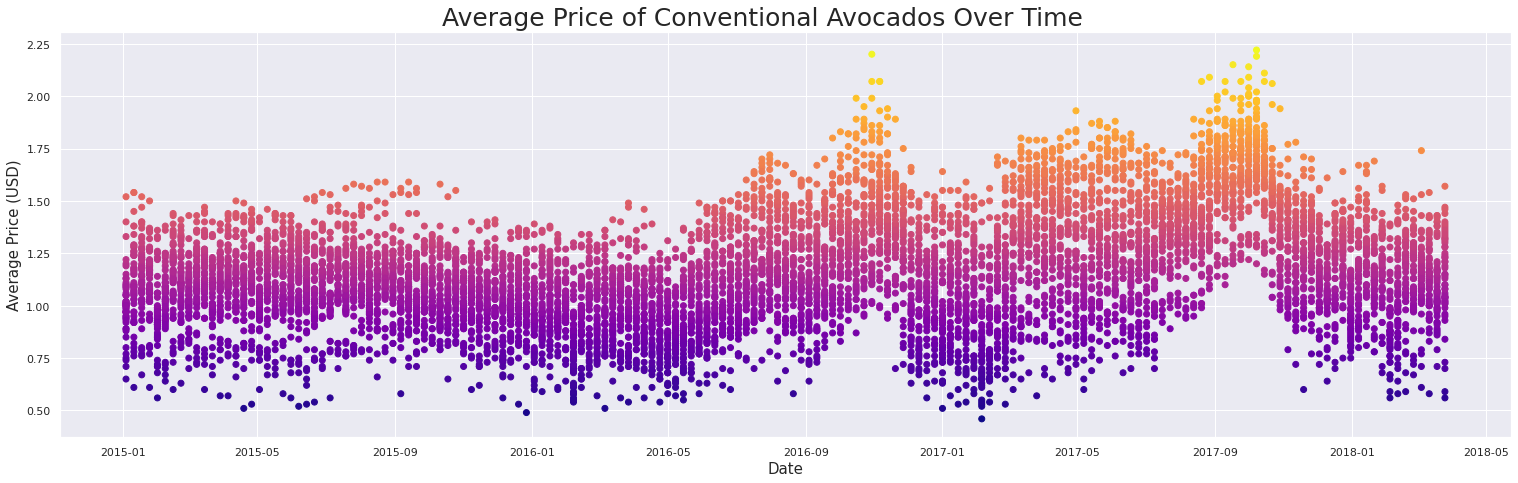

In [73]:
mask = df['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

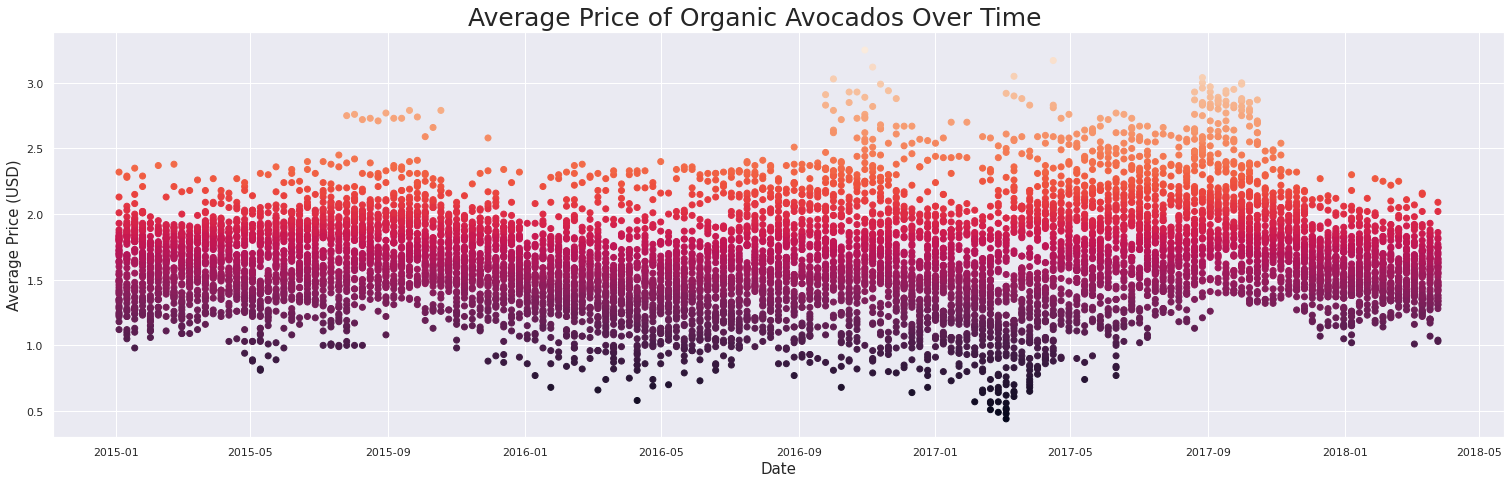

In [74]:
mask = df['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices)
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

In [75]:
df2 = df[['Date', 'AveragePrice']]
df2 = df2.set_index('Date')

weekly_df = df2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df

,Date,AveragePrice
0,2015-01-04,1.301
1,2015-01-11,1.371
2,2015-01-18,1.391
3,2015-01-25,1.397
4,2015-02-01,1.247
...,...,...
164,2018-02-25,1.360
165,2018-03-04,1.350
166,2018-03-11,1.335
167,2018-03-18,1.314


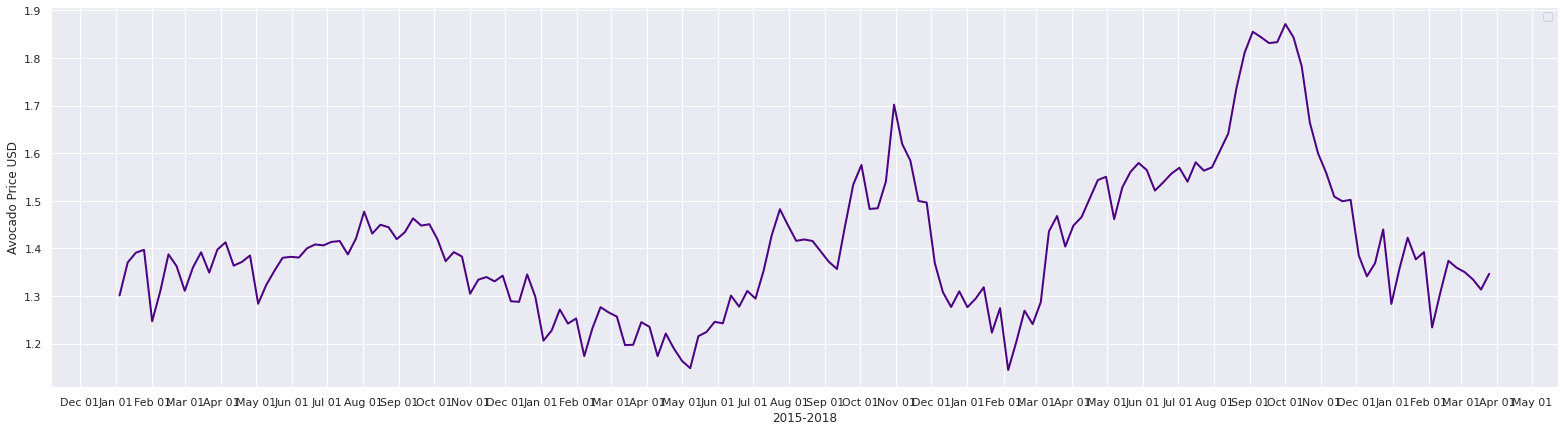

In [76]:
import matplotlib.dates as mdates
fig = plt.figure(figsize = (27, 7))
ax = plt.axes()

ax.xaxis.set_major_locator(mdates.MonthLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(w_df['Date'],w_df['AveragePrice'],color='indigo', linewidth=2)
plt.xlabel("2015-2018")
plt.ylabel("Avocado Price USD")
plt.legend()
plt.show()

In [77]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
w_df.columns = ['ds', 'y']

from prophet import Prophet

P=Prophet(interval_width=0.95,daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=False, changepoint_range=1) 

P.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)


P.fit(w_df)

future = P.make_future_dataframe(freq='W', periods=4)  # Let's predict the next month's average prices

future.tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp442pv12j/lkwsldxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp442pv12j/k0otzenu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31047', 'data', 'file=/tmp/tmp442pv12j/lkwsldxu.json', 'init=/tmp/tmp442pv12j/k0otzenu.json', 'output', 'file=/tmp/tmp442pv12j/prophet_model8l51_lp0/prophet_model-20230113102433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
168,2018-03-25
169,2018-04-01
170,2018-04-08
171,2018-04-15
172,2018-04-22


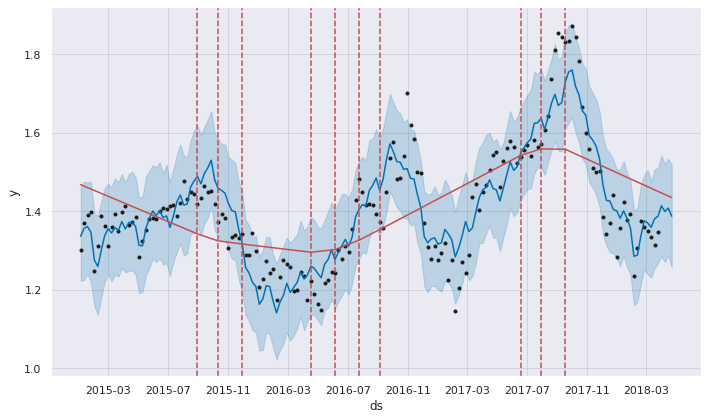

In [79]:
from prophet.plot import add_changepoints_to_plot
forecast=P.predict(future)
fig = P.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), P, forecast)

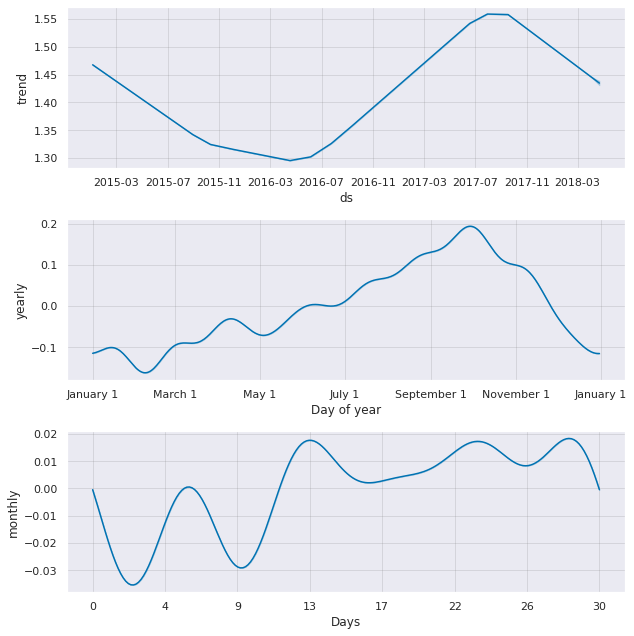

In [80]:
fig2 = P.plot_components(forecast)

In [81]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(P, initial = '365 days', period = '30 days', horizon = '30 days')
df_cv

INFO:prophet:Making 27 forecasts with cutoffs between 2016-01-05 00:00:00 and 2018-02-23 00:00:00


  0%|          | 0/27 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp442pv12j/avaqouil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp442pv12j/3plszldk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18305', 'data', 'file=/tmp/tmp442pv12j/avaqouil.json', 'init=/tmp/tmp442pv12j/3plszldk.json', 'output', 'file=/tmp/tmp442pv12j/prophet_modelx3icu_ao/prophet_model-20230113102436.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp442pv12j/joey_27z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp442pv12j/gp7_0rz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-10,1.168,1.130,1.205,1.228,2016-01-05
1,2016-01-17,1.171,1.136,1.206,1.272,2016-01-05
2,2016-01-24,1.206,1.170,1.243,1.242,2016-01-05
3,2016-01-31,1.247,1.206,1.283,1.253,2016-01-05
4,2016-02-07,1.297,1.260,1.337,1.174,2016-02-04
...,...,...,...,...,...,...
111,2018-02-25,1.418,1.299,1.551,1.360,2018-02-23
112,2018-03-04,1.424,1.306,1.549,1.350,2018-02-23
113,2018-03-11,1.423,1.288,1.548,1.335,2018-02-23
114,2018-03-18,1.451,1.323,1.585,1.314,2018-02-23


In [82]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
23,26 days,0.020,0.140,0.103,0.070,0.045,0.068,0.341
24,27 days,0.010,0.102,0.076,0.053,0.033,0.052,0.500
25,28 days,0.009,0.097,0.083,0.057,0.045,0.057,0.455
26,29 days,0.019,0.138,0.117,0.079,0.099,0.080,0.364
27,30 days,0.027,0.164,0.153,0.104,0.106,0.105,0.182


In [83]:
df_p.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,28,28.000,28.000,28.000,28.000,28.000,28.000,28.000
mean,16 days 12:00:00,0.018,0.132,0.109,0.077,0.070,0.076,0.394
std,8 days 05:25:24.250324976,0.007,0.025,0.026,0.018,0.026,0.018,0.188
min,3 days 00:00:00,0.006,0.080,0.061,0.043,0.029,0.043,0.091
25%,9 days 18:00:00,0.012,0.111,0.091,0.064,0.049,0.063,0.250
50%,16 days 12:00:00,0.018,0.135,0.108,0.077,0.066,0.076,0.386
75%,23 days 06:00:00,0.023,0.153,0.128,0.092,0.091,0.088,0.528
max,30 days 00:00:00,0.031,0.176,0.153,0.109,0.110,0.107,0.750


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


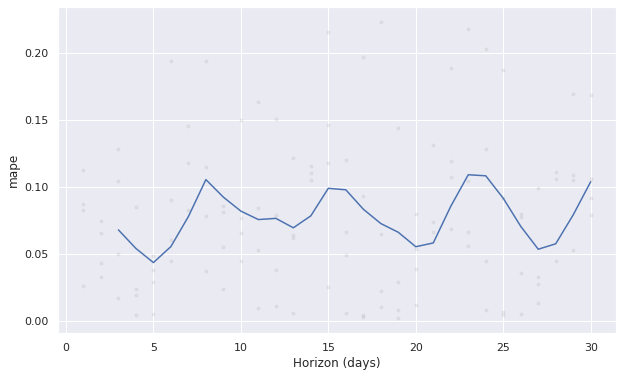

In [84]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [85]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

forecastedvalues

,ds,yhat
168,2018-03-25,1.387
169,2018-04-01,1.414
170,2018-04-08,1.399
171,2018-04-15,1.408
172,2018-04-22,1.387


Red = Predicted Values, Blue = Base Values


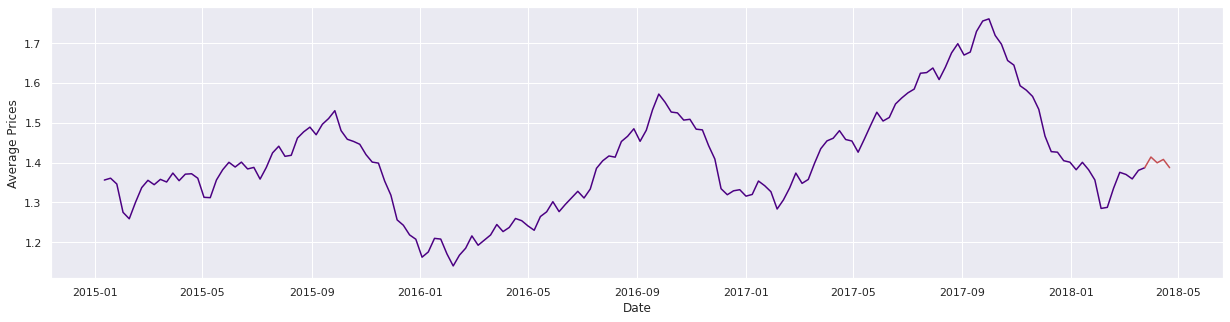

In [86]:
fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='indigo')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

In [87]:
df = df.drop(['Date'], axis = 1)
regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

43

In [88]:
type_counts = df.groupby('type').size()
type_counts

type
conventional    7267
organic         7264
dtype: int64

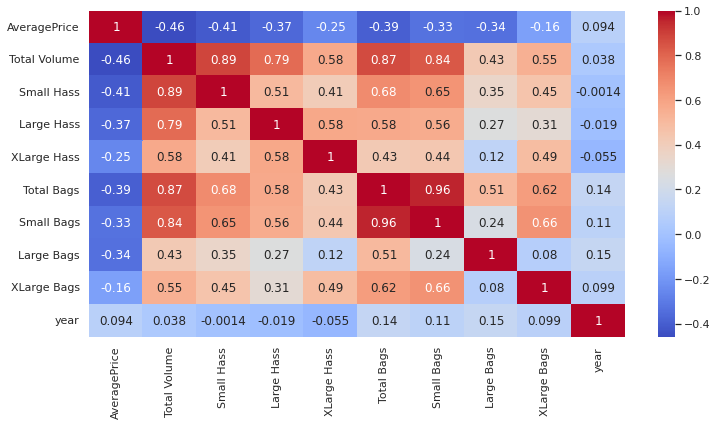

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [90]:
df_V = df.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').agg('sum')
df_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,3.957e+08,3.817e+08,3.455e+07,1.425e+08,2.841e+07,1.324e+06
2016,3.374e+08,3.684e+08,3.782e+07,2.631e+08,8.073e+07,4.895e+06
2017,3.668e+08,3.405e+08,2.297e+07,2.812e+08,9.325e+07,5.384e+06
2018,1.014e+08,8.964e+07,5.804e+06,7.921e+07,2.831e+07,1.589e+06


In [91]:
df = df.drop(['Total Bags','Total Volume'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14531 non-null  float64
 1   Small Hass    14531 non-null  float64
 2   Large Hass    14531 non-null  float64
 3   XLarge Hass   14531 non-null  float64
 4   Small Bags    14531 non-null  float64
 5   Large Bags    14531 non-null  float64
 6   XLarge Bags   14531 non-null  float64
 7   type          14531 non-null  object 
 8   year          14531 non-null  int64  
 9   region        14531 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.2+ MB


In [92]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
correlations

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000,-0.412,-0.365,-0.253,-0.329,-0.335,-0.158,0.094
Small Hass,-0.412,1.000,0.505,0.412,0.654,0.348,0.454,-0.001
Large Hass,-0.365,0.505,1.000,0.580,0.564,0.265,0.309,-0.019
XLarge Hass,-0.253,0.412,0.580,1.000,0.437,0.121,0.493,-0.055
Small Bags,-0.329,0.654,0.564,0.437,1.000,0.238,0.659,0.109
Large Bags,-0.335,0.348,0.265,0.121,0.238,1.000,0.080,0.150
XLarge Bags,-0.158,0.454,0.309,0.493,0.659,0.080,1.000,0.099
year,0.094,-0.001,-0.019,-0.055,0.109,0.150,0.099,1.000


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags']) 
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago
10009,1.68,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton
1819,1.52,-0.394,-0.331,-0.269,-0.336,-0.286,-0.231,conventional,2015,Pittsburgh
9333,1.64,-0.408,-0.580,-0.347,-0.426,-0.367,-0.231,organic,2015,Boise
2807,0.75,1.701,0.483,0.414,0.912,-0.306,-0.231,conventional,2015,WestTexNewMexico


In [94]:
X = df.drop(['AveragePrice'], axis = 1)
print('X=',X.shape)
y = df['AveragePrice']
y=np.log1p(y)
Xcat=pd.get_dummies(X[["type","region"]], drop_first = True)
Xnum=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]
X= pd.concat([Xcat, Xnum], axis = 1)
print('X=',X.shape)

X= (14531, 9)
X= (14531, 49)


In [95]:
F_DF = pd.concat([y,X],axis=1)
F_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                14531 non-null  float64
 1   type_organic                14531 non-null  uint8  
 2   region_Atlanta              14531 non-null  uint8  
 3   region_BaltimoreWashington  14531 non-null  uint8  
 4   region_Boise                14531 non-null  uint8  
 5   region_Boston               14531 non-null  uint8  
 6   region_BuffaloRochester     14531 non-null  uint8  
 7   region_Charlotte            14531 non-null  uint8  
 8   region_Chicago              14531 non-null  uint8  
 9   region_CincinnatiDayton     14531 non-null  uint8  
 10  region_Columbus             14531 non-null  uint8  
 11  region_DallasFtWorth        14531 non-null  uint8  
 12  region_Denver               14531 non-null  uint8  
 13  region_Detroit              14531 

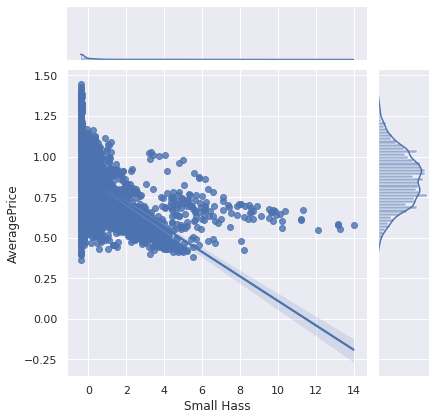

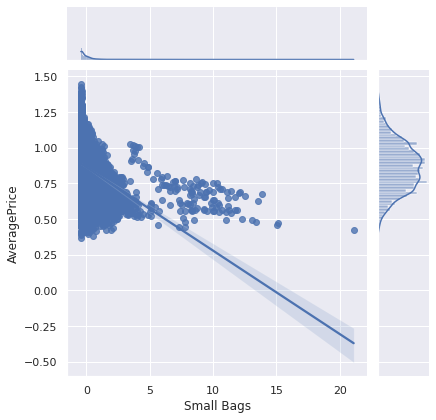

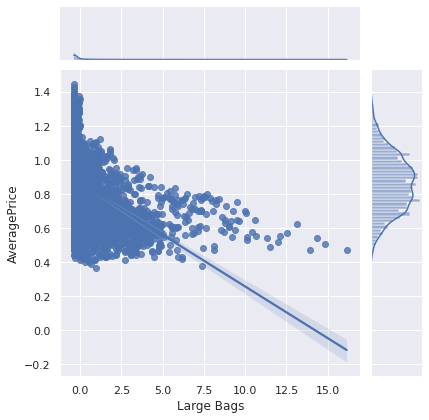

In [96]:
import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=F_DF, kind="reg");
sns.jointplot(x="Small Bags", y="AveragePrice", data=F_DF, kind="reg");
sns.jointplot(x="Large Bags", y="AveragePrice", data=F_DF, kind="reg");

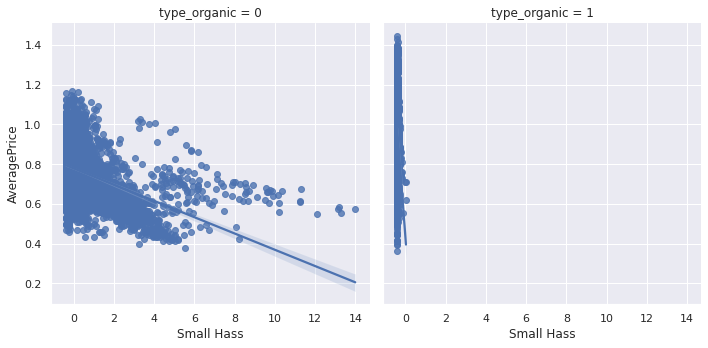

In [97]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=F_DF, col_wrap=2);

In [99]:
X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

In [100]:
from sklearn.svm import SVR
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

linear 0.642019887912717
poly 0.7666695753740875
rbf 0.7948267556500264
sigmoid -912617.2153032974


In [101]:
Svr=SVR(kernel='rbf', C=1, gamma= 0.5)
Svr.fit(X_train,y_train)
Svr.score(X_train,y_train)

0.8208135882180101

In [106]:
import math
error = math.sqrt(metrics.mean_squared_error(y_test,Svr.predict(X_test))) 
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.13543908976583424
